In [72]:
# IMPORTATIONS DES PACKAGES NECESSAIRES AU TRAVAIL

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Le Data Set

In [73]:
# Construction du Data set
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
# Redimensionner la variable y pour qu'elle prenne 100 lignes et une colonne
y = y.reshape((y.shape[0], 1))

# Afficher les dimensions des variables
print("Dimensions de X :", X.shape)
print("Dimensions de Y :", y.shape)

Dimensions de X : (100, 2)
Dimensions de Y : (100, 1)


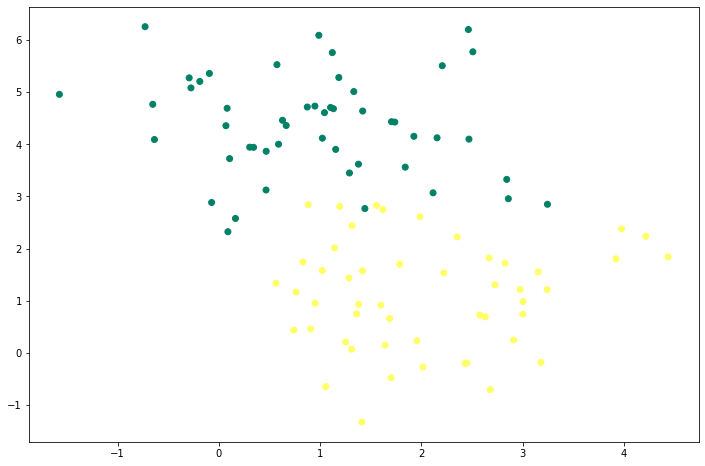

In [74]:
# Visualisation des deux 1eres ocurrences de ma variable X
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.show()

# 2. Les fonctions du Modèle

In [75]:
# Fonction d'initilisation
def initialisation(X):

    # le nbre de paramètres W que nous avons besoin
    W = np.random.randn(X.shape[1], 1)  # dimension (2, 1)
    # le paramètre b est un nbre réel
    b = np.random.rand(1)

    # Cette fonction retourne un tuple
    return W, b



# Tester la fonction initialisation()
W, b = initialisation(X)
print("La dimension de W :", W.shape)
print("La dimension de b :", b.shape)
print("On peut voir que b est un nbre réel :", b)

La dimension de W : (2, 1)
La dimension de b : (1,)
On peut voir que b est un nbre réel : [0.86459955]


In [76]:
# Modèle de Machine Learning
def model(X, W, b):

    Z = X.dot(W) + b

    # Voyons voir la valeur maximale du modèle
    # print("la valeur maxi du modèle est :", Z.max())
    # fonction d'activation
    A = 1 / (1 + np.exp(-Z))

    # Le modèle retourne les activations
    return A

A = model(X, W, b)
# Vérifier la dimension de A
print("Dimensions d'activation", A.shape)


Dimensions d'activation (100, 1)


In [77]:
# Fonction log loss (fonction coût)
def log_loss(A, y):

    # Pour résoudre le problème d'overflow, procédons au calcul de l'epsilon
    #epsilon = 1e-15 # En faisant ainsi, le coût sera impacté y compris la courbe de visualisation
    # m = len(y) --> le nbre d'échantillons que l'on a dans y (taille de y)
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

# Vérification de la foncion log loss
print("la fonction coût nous donne :", log_loss(A, y))

la fonction coût nous donne : 1.468898209811137


In [78]:
# Les gradients
def gradients(A, X, y):
    
    dw = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A- y)

    # Retourner les gradients
    return dw, db

# Tester la fonction des gradients
dw, db = gradients(A, X, y)
print("dimension de dw :", dw.shape)
# db est un nbre réel
print("db est un nbre réel :", db)

dimension de dw : (2, 1)
db est un nbre réel : 0.4094102767172331


In [79]:
# Fonction de mise à jour
def update(dW, db, W, b, learning_rate): # learning_rate = vitesse d'apprentissage
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    return W, b

In [80]:
# Fonction de prédiction
def predict(X, W, b):

    # calcul des activations (sorties du modèle)
    A = model(X, W, b)

    # Afficher la proba
    #print("La proba que cette plante appartient à cette classe est de :", A)

    # Retourner vrai si > 0.5 et faux si < 0.5
    return A >= 0.5

In [81]:
# choisir l'exactitude en vue de voir la performance du modèle
from sklearn.metrics import accuracy_score

In [105]:
from tqdm import tqdm # tqdm vient de l'arabe takaduma = progression

In [106]:
# Fonction regroupant toutes les fonctions afin de tourner en boucle sur la boucle
# d'apprentissage

# Pour voir si notre modèle est en overfiting, on va aussi 
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):

    # initialisation des paramètres W, b
    W, b = initialisation(X)
    
    # Sauvegarde de toute l'historique d'apprentissage de la machine
    #history = []
    Loss = []

    # boucle d'apprentissage
    # Il faut ajouter une barre de progression "tqdm" lorsque l'on exécute un code très long
    for i in tqdm(range(n_iter)):

        # repétition en boucle de toutes les étapes d'initialisation
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        # Calcul ces gradients
        dW, b = gradients(A, X, y)
        # mise à jour des paramètres W et b qui seront réutilisés tout en haut
        W, b = update(dW, db, W, b, learning_rate)
        # history.append([W, b, Loss, i])
    
    y_pred = predict(X, W, b)
    # Afficher la performance du modèle en comparant les données y avec les prédictions
    print("performance du modèle :", accuracy_score(y, y_pred))

    # Visualiser l'évolution du coût
    plt.figure(figsize=(12, 6))
    # Afficher la liste des erreurs
    plt.plot(Loss)
    plt.title("LOSS")
    plt.show()

    # retourner les paramètres W et b que le modèle a appris
    return W, b
    


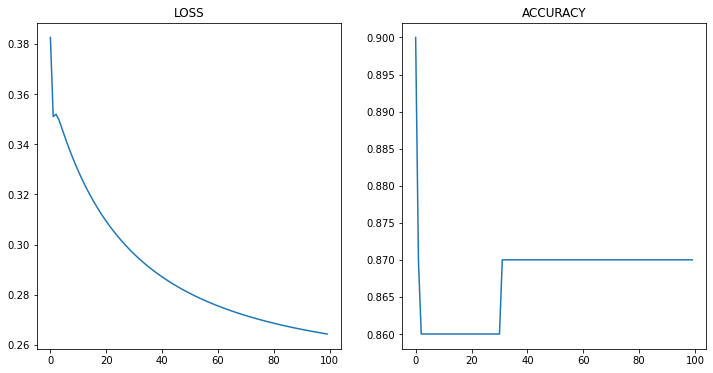

In [83]:
# Evolution des erreurs générées par le modèle
W, b = artificial_neuron(X, y)

In [84]:
W, b

(array([[ 1.38560773],
        [-0.94367623]]),
 -0.10004724695345144)

# 3. La frontière de décision

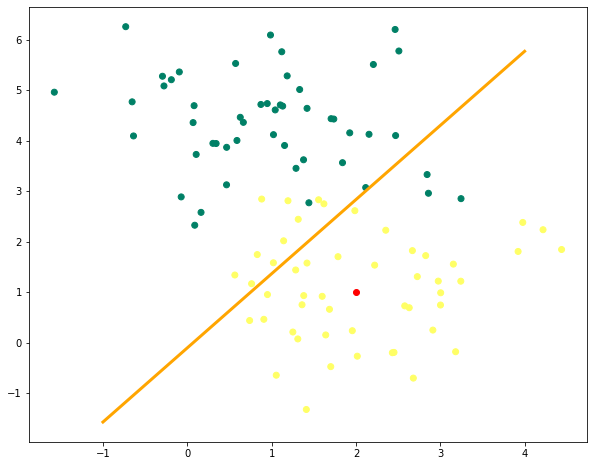

array([ True])

In [85]:
# Nouvelle plante
new_plant = np.array([2, 1])

# fronctière de décision entre les deux classes de plantes (toxiques et non toxiques)
# Pour cela on peut calculer l'équation de la droite
x0 = np.linspace(-1, 4, 100) # 100 points entre -1 et 4
x1 = (-W[0] * x0 - b) / W[1]

# Création de la grille de tous éléments
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c="r")
# Affichage de la fronctière de décision
plt.plot(x0, x1, c="orange", lw=3)
plt.show()
# Vérifier si la plante est toxique (True=1) ou non(False=0)
predict(new_plant, W, b)

# 4. Les Visualisations en 3D

In [86]:
import plotly.graph_objects as go

In [87]:
fig = go.Figure(data=[go.Scatter3d(
x=X[:, 0].flatten(), 
y=X[:, 1].flatten(),
z=y.flatten(),
mode="markers",
marker=dict(
    size=5,
    color=y.flatten(),
    colorscale="YlGn",
    opacity=0.8,
    reversescale=True
    )
)])

fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

#### Visualisation avec la frontière de décision
-- Fonction Sigmoïde

In [108]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
# Modèle
Z = W[0] * xx0 + W[1] * xx1 + b
# Activation
A = 1 / (1 + np.exp(-Z))

# Affichage
fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale="YlGn", 
                                opacity=0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode="markers",
marker=dict(size=5, color=y.flatten(), colorscale="YlGn", opacity=0.9, reversescale=True))

fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()